In [1]:
#libraries import
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import glob
import numpy as np
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#connecting google colab with the google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!ls "/content/drive/My Drive/austin-zoning-satellite-images-main/data/data/"

In [0]:
#same pixels for all images- all images have different dimensions
imdir = "/content/drive/My Drive/austin-zoning-satellite-images-main/data/data/"
ext = ['jpg', 'jpeg']
size = 400, 400 #(400,400) pixels for all images
files = []
[files.extend(glob.glob(imdir + '*.' + e)) for e in ext]
images = [Image.open(file) for file in files]
for file in files:
    im = Image.open(file)
    im_resized = im.resize(size, Image.ANTIALIAS)
    im_resized.save(file[:-4]+ ".png", "PNG") #saving all images in a png format to remove noise

In [4]:
#file which contains the information of all images with labels
x = pd.read_csv("/content/drive/My Drive/austin-zoning-satellite-images-main/data/data/austin.csv")

In [5]:
#reading images names from dataframe
images = x['image_name']

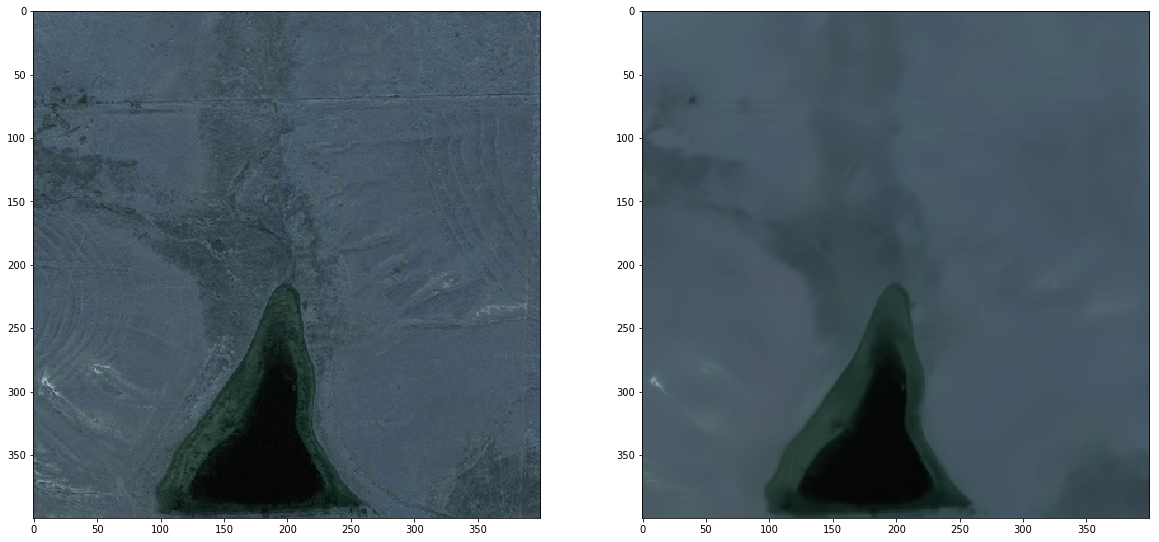

In [17]:
#image visualization with noise and after removing noise
img = cv2.imread("/content/drive/My Drive/austin-zoning-satellite-images-main/data/data/austin_3.png")
dst = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax.imshow(img)
ax2.imshow(dst)

In [ ]:
#saving images after denoising
for i in images:
    img = cv2.imread("/content/drive/My Drive/austin-zoning-satellite-images-main/data/" + str(i[:-4])+".png")
    dst = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)
    cv2.imwrite("/content/drive/My Drive/austin-zoning-satellite-images-main/data/" + str(i[:-4])+".png", dst)

In [30]:
#reading all images
data = []
for i in images:
    data.append(cv2.imread("./austin-zoning-satellite-images-main/data/" + str(i[:-4])+".png"))

In [31]:
#reaing image labels
labels = list(x['zoning_zty'])

In [32]:
data = np.array(data) #contains images data in pixels
labels = np.array(labels) #contains the labels for images

(array([105.,   0., 116.,   0.,   3.,   0.,  10.,   0.,  31.,   6.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

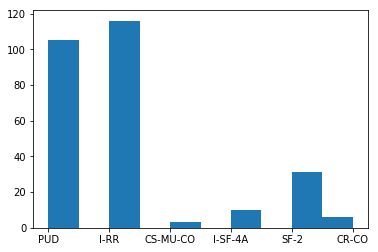

In [61]:
plt.hist(labels[:500], range=[0,5])

(array([21.,  0., 22.,  0.,  0.,  2.,  0.,  5.,  0., 19.]),
 array([ 6. ,  6.4,  6.8,  7.2,  7.6,  8. ,  8.4,  8.8,  9.2,  9.6, 10. ]),
 <a list of 10 Patch objects>)

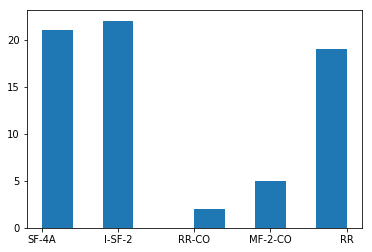

In [62]:
plt.hist(labels[:500], range=[6,10])

In [0]:
labels = pd.get_dummies(labels) #one hot encoding for labels

In [10]:
#spliting data into train and test parts
X_train, X_test, Y_train, Y_test = train_test_split(data[:500], labels[:500], train_size=.9)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [2]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

Using TensorFlow backend.


In [3]:
#deep learning model
input_shape = ((400, 400, 3)) #input will be of 400,400 pixels
X_input = Input(input_shape)
    
# Zero-Padding: pads the border of X_input with zeroes
X = ZeroPadding2D((3, 3))(X_input)

# CONV -> BN -> RELU Block applied to X
X = Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0')(X)
X = BatchNormalization(axis = 3, name = 'bn0')(X)
X = Activation('relu')(X)

# MAXPOOL
X = AveragePooling2D((2, 2), name='max_pool0')(X)

# CONV -> BN -> RELU Block applied to X
X = Conv2D(32, (5, 5), strides = (1, 1), name = 'conv1')(X)
X = BatchNormalization(axis = 3, name = 'bn1')(X)
X = Activation('relu')(X)

# MAXPOOL
X = AveragePooling2D((2, 2), name='max_pool1')(X)

# CONV -> BN -> RELU Block applied to X
X = Conv2D(32, (3, 3), strides = (1, 1), name = 'conv2')(X)
X = BatchNormalization(axis = 3, name = 'bn2')(X)
X = Activation('relu')(X)

# MAXPOOL
X = AveragePooling2D((2, 2), name='max_pool2')(X)

# FLATTEN X (means convert it to a vector) + FULLYCONNECTED
X = Flatten()(X)
X = Dense(167, activation='softmax', name='fc')(X)

# Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
model = Model(inputs = X_input, outputs = X, name='satellite')

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 400, 400, 3)       0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 406, 406, 3)       0         
_________________________________________________________________
conv0 (Conv2D)               (None, 400, 400, 32)      4736      
_________________________________________________________________
bn0 (BatchNormalization)     (None, 400, 400, 32)      128       
_________________________________________________________________
activation_1 (Activation)    (None, 400, 400, 32)      0         
_________________________________________________________________
max_pool0 (AveragePooling2D) (None, 200, 200, 32)      0         
_________________________________________________________________
conv1 (Conv2D)               (None, 196, 196, 32)      25632     
__________

In [0]:
model.compile(optimizer="sgd", loss="mean_squared_error", metrics=["accuracy"])

In [20]:
model.fit(x=X_train, y=Y_train, epochs=50, batch_size=32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
450/450 [==============================] - 238s 529ms/step - loss: 0.0060 - acc: 0.0022
Epoch 2/50
450/450 [==============================] - 228s 507ms/step - loss: 0.0060 - acc: 0.0178
Epoch 3/50
450/450 [==============================] - 230s 510ms/step - loss: 0.0059 - acc: 0.1267
Epoch 4/50
450/450 [==============================] - 229s 509ms/step - loss: 0.0057 - acc: 0.2289
Epoch 5/50
450/450 [==============================] - 230s 510ms/step - loss: 0.0056 - acc: 0.2533
Epoch 6/50
450/450 [==============================] - 228s 507ms/step - loss: 0.0055 - acc: 0.2711
Epoch 7/50
450/450 [==============================] - 228s 507ms/step - loss: 0.0054 - acc: 0.3156
Epoch 8/50
450/450 [==============================] - 229s 508ms/step - loss: 0.0052 - acc: 0.3311
Epoch 9/50
450/450 [==============================] - 229s 508ms/step - loss: 0.0051 - acc: 0.3489
Epoch 10/50
450/450 [==============================] - 230s 5

In [29]:
preds = model.evaluate(x=X_test, y=Y_test)
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

50/50 [==============================] - 7s 147ms/step

Loss = 0.002665893640369177
Test Accuracy = 0.6800000047683716


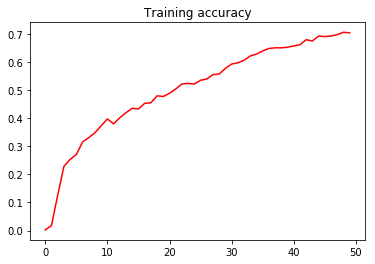

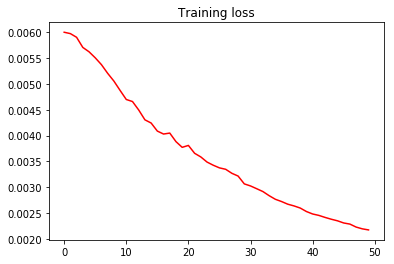

In [26]:
import matplotlib.pyplot as plt
def plot_training(history):
  acc = history.history.history['acc']
  loss = history.history.history['loss']
  epochs = range(len(acc))
  
  plt.plot(epochs, acc, 'r')
  plt.title('Training accuracy')
  
  plt.figure()
  plt.plot(epochs, loss, 'r')
  plt.title('Training loss')
  plt.show()
  
plot_training(model)